# COGS 108 - Final Project

# Permissions

Place an X in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

[X] YES - make available
[ ] NO - keep private

# Overview

In this final project, our team will analyze the number of police fatal shooting events from 2015 to 2020. We want to investigate whether these events would decrease significantly due to the pandemic of COVID-19. We will be using the dataset collected by the Washington Post. After we conducted the t-tests, we confirmed that the number of shooting cases did decrease after (during) the spread of COVID-19.

# Names

- Yilan Guo
- Xueru Xie
- Jinsong Yang
- Zeqian Min
- Eric Wang

# Group Members IDs

- A15563949
- A15451232
- A15389337
- A15481129
- A15545920

# Research Question

With the knowledge that the COVID-19 virus outbreak resulted in government regulations that changed the behaviors/routines of the average American citizen, how have police shootings (where police fatally shoot an American citizen) changed as well?

Subquestions:
- How has the distribution of weapon types, race, age, and gender among police shooting victims been affected by the Centers for Disease Control and Prevention's (CDC) emergency outbreak declaration?
- What is the distribution of police shootings across states in the US?
- **How has the number of police shootings been affected by the Centers for Disease Control and Prevention's (CDC) emergency outbreak declaration?**


# Background and Prior Work

We are interested in studying gun shooting events in America because we want to know how serious is this affecting many Americans. We want to know why American people keep dying under mass shootings. Specifically, we want to know where a gun shooting happens, what kind of weapons do shooters carry, and the characteristics of the shooters. It is important to know about these attributes because reports show that active shooters often share characteristics and exhibit similar behavior in the weeks and months before an attack (1). Our hypothesis is that gun shooting events should decrease after the outbreak of COVID-19 because of the stay home orders that prevent people shooting others. The article from Bloomberg confirms our prediction, since "the number of mass shooting incidents, killings and firearm injuries all dropped as states and cities took aggressive measures to contain the virus" (2).



References (include links):

1) https://qz.com/1456558/the-fbis-warning-signs-of-a-mass-shooter/ 

2) https://www.bloomberg.com/news/articles/2020-05-09/one-good-thing-from-the-pandemic-mass-shootings-in-u-s-plunge

# Hypothesis

The rate of gun shooting event in the United States has decreased since the pandemic of COVID-19 in Febuary. The cause of this decrease in gun shooting event is due to the scare of contracting COVID virus in public. As a result, we believe that with less people in the public, the number of gun shooting cases will decrease throughout the country.


Null Hypothesis: The number of fatal police shooting cases is not affected by COVID-19.

Alternative Hypothesis: The number of fatal police shooting cases is decreased due to COVID-19.

# Dataset(s)

Dataset Name:
Link to the dataset: https://github.com/washingtonpost/data-police-shootings
Number of observations: 5865 rows, 17 columns.

Our dataset comes from the Washington Post database. This dataset contains every fatal shooting in America by the police, starting from January, 2015 to December, 2020. Each observation contains the incident ID, name of the person that is killed by the police, the date being killed, type of death, the person's weapon, age, gender race, city, state, mental illness sign, threat level, flee condition, body camera of the police, geographic location of the incident, and whether there is exact geocoding of the incident.

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as colors
from scipy import stats # t-test
import plotly.graph_objects as go # choropleth
from IPython.display import Image # load choropleth map image

%matplotlib inline

# Data Cleaning


In [2]:
# Load data
data = pd.read_csv('fatal-police-shootings-data.csv')
data.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,longitude,latitude,is_geocoding_exact
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False,-123.122,47.247,True
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False,-122.892,45.487,True
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False,-97.281,37.695,True
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False,-122.422,37.763,True
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False,-104.692,40.384,True


In [3]:
# Dtypes will display what type of value is stored in each column.
data.dtypes

id                           int64
name                        object
date                        object
manner_of_death             object
armed                       object
age                        float64
gender                      object
race                        object
city                        object
state                       object
signs_of_mental_illness       bool
threat_level                object
flee                        object
body_camera                   bool
longitude                  float64
latitude                   float64
is_geocoding_exact            bool
dtype: object

Here, we can see the types of values stored in each column. Some of these columns are storing variables as types that aren't very intuitive, and even potentially misleading. For example, the `id` column is currently storing integer values, but in reality, id numbers are meant to be categorical variables that act as unique identifiers. Therefore, it makes more sense to convert the `id` values to string values. Similarly, converting the `date` values to datetime format may offer more analysis options. Let's do these now!

In [4]:
data['id'] = data['id'].astype('str')
data['date'] = pd.to_datetime(data['date'], format='%Y-%m-%d')

Using the datetime format, we can easily extract date values (such as year and month) as new features. Here, we are extracting the year and month of each incident in new columns named `year` and `month` respectively.

In [5]:
# We can also add features that will help our analysis! Here we extract the year from the datetime values.
data['year'] = data['date'].dt.year

In [6]:
data['month'] = data['date'].dt.month

In [7]:
data.dtypes

id                                 object
name                               object
date                       datetime64[ns]
manner_of_death                    object
armed                              object
age                               float64
gender                             object
race                               object
city                               object
state                              object
signs_of_mental_illness              bool
threat_level                       object
flee                               object
body_camera                          bool
longitude                         float64
latitude                          float64
is_geocoding_exact                   bool
year                                int64
month                               int64
dtype: object

Now that the data types are set, let's take a look at the missing values.

In [8]:
# isnull.sum displays the number of null values in each column.
data.isnull().sum()

id                           0
name                       207
date                         0
manner_of_death              0
armed                      212
age                        254
gender                       1
race                       551
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                       319
body_camera                  0
longitude                  287
latitude                   287
is_geocoding_exact           0
year                         0
month                        0
dtype: int64

Here, we can see how many null values each column contains. Out of these columns, `signs_of_mental_illness`, `threat_level`, `flee`, and `body_camera` are features that we don't plan to use in our analysis. Additionally, we need to remove personal data to comply with the Safe Harbour Method.

Therefore, we can simply drop these columns now.

In [9]:
# dropping personal identifying information
data.drop(['name', 'city', 'is_geocoding_exact'], axis=1, inplace=True)

# dropping data we don't need for analysis
data.drop(['signs_of_mental_illness', 'threat_level', 'flee', 'body_camera'], axis=1, inplace=True)

Unfortunately, since there are so many missing values, we can't use imputation without potentially skewing results, so we need to drop the rows that contain null values.

In [10]:
data.dropna(inplace=True)
data.head()

,id,date,manner_of_death,armed,age,gender,race,state,longitude,latitude,year,month
0,3,2015-01-02,shot,gun,53.0,M,A,WA,-123.122,47.247,2015,1
1,4,2015-01-02,shot,gun,47.0,M,W,OR,-122.892,45.487,2015,1
2,5,2015-01-03,shot and Tasered,unarmed,23.0,M,H,KS,-97.281,37.695,2015,1
3,8,2015-01-04,shot,toy weapon,32.0,M,W,CA,-122.422,37.763,2015,1
4,9,2015-01-04,shot,nail gun,39.0,M,H,CO,-104.692,40.384,2015,1


In [11]:
data.shape

(4787, 12)

In [12]:
# After dropping the null values, we can now set age to integer values
data['age'] = data['age'].astype('int')

Now that all the missing values have been dropped, let's check the unique values in each column to see if there are any abnormalities.

In [13]:
for col in data.columns:
    print(col)
    print(data[col].unique())
    print('\n')

id
['3' '4' '5' ... '6400' '6411' '6410']


date
['2015-01-02T00:00:00.000000000' '2015-01-03T00:00:00.000000000'
 '2015-01-04T00:00:00.000000000' ... '2020-12-04T00:00:00.000000000'
 '2020-12-06T00:00:00.000000000' '2020-12-08T00:00:00.000000000']


manner_of_death
['shot' 'shot and Tasered']


armed
['gun' 'unarmed' 'toy weapon' 'nail gun' 'knife' 'shovel' 'vehicle'
 'hammer' 'hatchet' 'sword' 'machete' 'box cutter' 'undetermined'
 'metal object' 'screwdriver' 'lawn mower blade' 'flagpole'
 'guns and explosives' 'cordless drill' 'metal pole' 'Taser' 'metal pipe'
 'metal hand tool' 'blunt object' 'metal stick' 'sharp object'
 'meat cleaver' 'carjack' 'chain' "contractor's level" 'unknown weapon'
 'stapler' 'crossbow' 'bean-bag gun' 'baseball bat and fireplace poker'
 'straight edge razor' 'gun and knife' 'ax' 'brick' 'baseball bat'
 'hand torch' 'chain saw' 'garden tool' 'scissors' 'pole' 'pick-axe'
 'flashlight' 'spear' 'chair' 'pitchfork' 'hatchet and gun' 'rock'
 'piece of wood' 'b

For these columns, the only one with duplicate values (just worded differently) is `armed`, so let's write a function that can organize its values better. Although we lose some information in individuality, by classifying these objects, we can form greater generalizations from connections with the rest of the data.

In [14]:
def clean_armed(string):

    if string in ['Airsoft pistol', 'bean-bag gun', 'BB gun', 'air pistol', 'pellet gun']:
        return 'toy weapon'

    elif string in ['vehicle and gun', 'gun and car']:
        return 'gun and vehicle'
    
    elif string in ['vehicle and machete', 'car, knife, and mace']:
        return 'sharp object and vehicle'
    
    elif string == 'BB gun and vehicle':
        return 'toy gun and vehicle'
    
    elif string in ['metal object', 'unknown weapon', 'carjack']:
        return 'undetermined'
    
    elif string == 'motorcycle':
        return 'vehicle'
    
    elif string in ['gun and knife', 'hatchet and gun', 'machete and gun', 'gun and sword', 'gun and machete']:
        return 'gun and sharp object'
    
    elif string in ['baseball bat and fireplace poker', 'pole and knife', 'baseball bat and bottle', 'baseball bat and knife']:
        return 'sharp and blunt weapons'
    
    elif string in ['Taser', 'bow and arrow', 'crossbow', 'pepper spray', 'wasp spray']:
        return 'non-firearm ranged weapon'
    
    elif string in ['guns and explosives', 'hand torch', 'fireworks', 'incendiary device', 'grenade']:
        return 'incendiary device'
    
    elif string in ['knife', 'hatchet', 'sword', 'machete', 'box cutter', 'screwdriver', 'lawn mower blade', 'cordless drill', 'metal hand tool', 'sharp object', 'meat cleaver',
                   'straight edge razor', 'ax', 'chain saw', 'scissors', 'spear', 'pitchfork', 'bayonet', 'glass shard', 'metal rake', 'beer bottle', 'pen', 'chainsaw', 'samurai sword',
                   'ice pick', 'bottle', 'nail gun', 'stapler', 'pick-axe']:
        return 'sharp object'
    
    elif string in ['hammer', 'flagpole', 'metal pole', 'metal pipe', 'blunt object', 'metal stick', "contractor's level", 'brick', 'baseball bat', 'garden tool', 'pole',
                    'flashlight', 'chair', 'rock', 'piece of wood', 'baton', 'crowbar', 'oar', 'pipe', 'wrench', 'walking stick', 'barstool', 'tire iron', 'air conditioner']:
        return 'blunt object'

    else:
        return string

In [15]:
data['armed'] = data['armed'].apply(clean_armed)

Now, since February 3rd is the date when the CDC declared an emergency outbreak, we can see the difference in the police shooting victim's weapon from before and after COVID-19's announcement by splitting the data from before and after February 3rd. Let's save the data from each in new dataframes called 'pre_covid' and 'covid'.

In [16]:
# Set the split date
split_date = pd.datetime(2020, 2, 3)

pre_covid = data.loc[data['date'] <= split_date]
covid = data.loc[data['date'] > split_date]

E:\ANACONDA\lib\site-packages\ipykernel_launcher.py:2: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.



In [17]:
print('There are ' + str(pre_covid.shape[0]) + ' observations in the pre-covid dataframe.')
pre_covid.head()

There are 4179 observations in the pre-covid dataframe.


,id,date,manner_of_death,armed,age,gender,race,state,longitude,latitude,year,month
0,3,2015-01-02,shot,gun,53,M,A,WA,-123.122,47.247,2015,1
1,4,2015-01-02,shot,gun,47,M,W,OR,-122.892,45.487,2015,1
2,5,2015-01-03,shot and Tasered,unarmed,23,M,H,KS,-97.281,37.695,2015,1
3,8,2015-01-04,shot,toy weapon,32,M,W,CA,-122.422,37.763,2015,1
4,9,2015-01-04,shot,sharp object,39,M,H,CO,-104.692,40.384,2015,1


In [18]:
print('There are ' + str(covid.shape[0]) + ' observations in the covid dataframe.')
covid.head()

There are 608 observations in the covid dataframe.


,id,date,manner_of_death,armed,age,gender,race,state,longitude,latitude,year,month
5025,5513,2020-02-04,shot,sharp object,23,M,B,TX,-97.132,33.199,2020,2
5026,5516,2020-02-04,shot,gun,32,M,W,OK,-96.418,34.875,2020,2
5027,5563,2020-02-04,shot,sharp object,26,M,B,CA,-119.635,36.299,2020,2
5028,5564,2020-02-04,shot,sharp object,41,M,W,CA,-122.570,40.484,2020,2
5029,5523,2020-02-05,shot,sharp object,56,M,W,NV,-119.799,39.548,2020,2


And with that, we have successfully cleaned our data!

In [19]:
# Cleaned data
data.head()

,id,date,manner_of_death,armed,age,gender,race,state,longitude,latitude,year,month
0,3,2015-01-02,shot,gun,53,M,A,WA,-123.122,47.247,2015,1
1,4,2015-01-02,shot,gun,47,M,W,OR,-122.892,45.487,2015,1
2,5,2015-01-03,shot and Tasered,unarmed,23,M,H,KS,-97.281,37.695,2015,1
3,8,2015-01-04,shot,toy weapon,32,M,W,CA,-122.422,37.763,2015,1
4,9,2015-01-04,shot,sharp object,39,M,H,CO,-104.692,40.384,2015,1


# Data Analysis

# Univariate

We want to know about the statistics of gun fatal shootings. So, we will be specifically looking for the statistics of armed gun deaths.

Text(0.5, 0, 'Count')

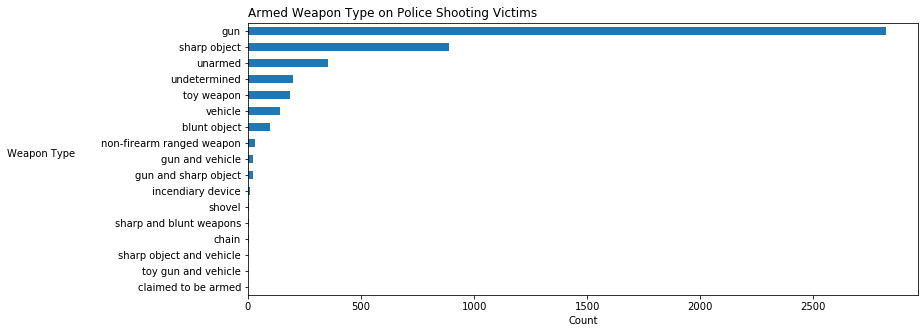

In [20]:
# Let's look at what kind of weapons were most common among the police shooting victims from before and after COVID-19

data.groupby(['armed']).count()['id'].sort_values(ascending = True).plot.barh()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Armed Weapon Type on Police Shooting Victims', loc='left')
plt.ylabel('Weapon Type', rotation=0, labelpad = 60)
plt.xlabel('Count')

In this plot, we can see that the police shooting victims were armed with guns significantly more than other weapons or being unarmed.

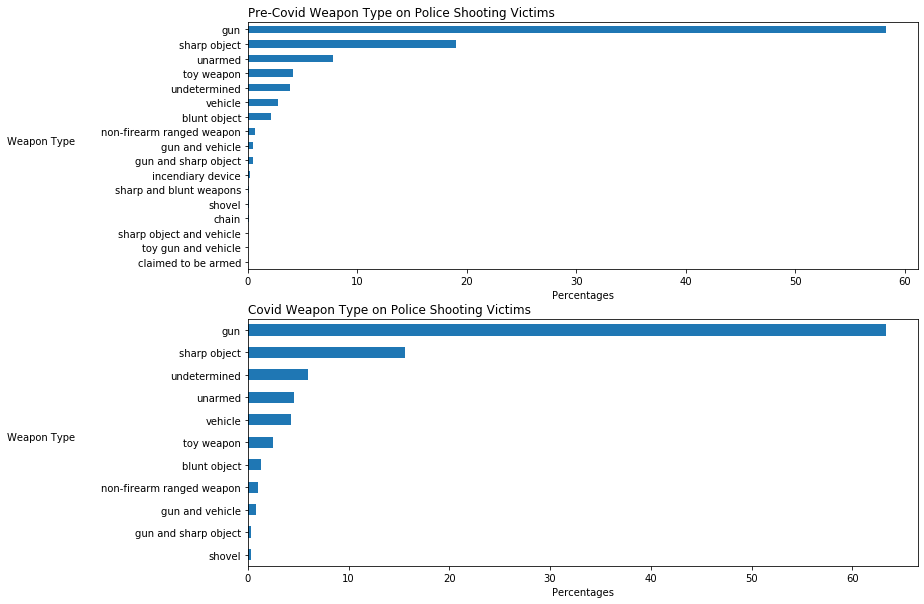

In [21]:
fig, (ax, ax2) = plt.subplots(nrows=2)

# We need to use percentages instead of counts because there are a different number of incidents pre-covid vs. covid.
pre_covid_percentages = pre_covid['armed'].value_counts(ascending=True) / len(pre_covid['armed']) * 100
covid_percentages = covid['armed'].value_counts(ascending=True) / len(covid['armed']) * 100

pre_covid_percentages.plot(kind='barh', ax=ax)
covid_percentages.plot(kind='barh', ax=ax2)

fig.set_size_inches(12, 10)
ax.set_title('Pre-Covid Weapon Type on Police Shooting Victims', loc='left')
ax2.set_title('Covid Weapon Type on Police Shooting Victims', loc='left')
ax.set_xlabel("Percentages")
ax2.set_xlabel("Percentages")
ax.set_ylabel("Weapon Type", rotation=0)
ax2.set_ylabel("Weapon Type", rotation=0)
ax.yaxis.labelpad = 60
ax2.yaxis.labelpad = 60

Here, we can see that these distributions are very similar. This indicates that weapon types on police shooting victims were the same before and after the CDC declared COVID-19 as an emergency outbreak.

Text(0.5, 0, 'Count')

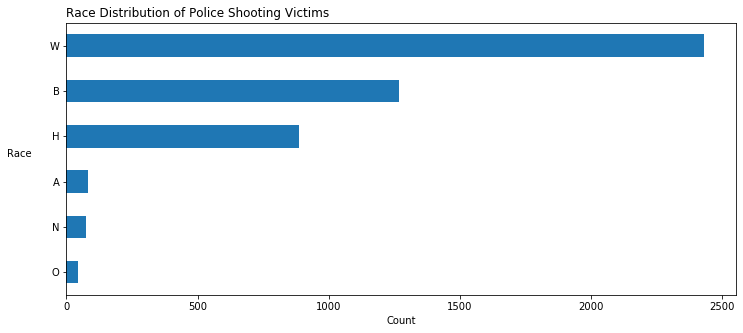

In [22]:
# Let's see the race of the people being killed by the police

data['race'].value_counts(ascending=True).plot.barh()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Race Distribution of Police Shooting Victims', loc='left')
plt.ylabel('Race', rotation=0, labelpad = 30)
plt.xlabel('Count')

From this bar chart of the Police Shooting victims' races, we see that there are significantly more white victims than other races, followed by black victims and hispanic victims.

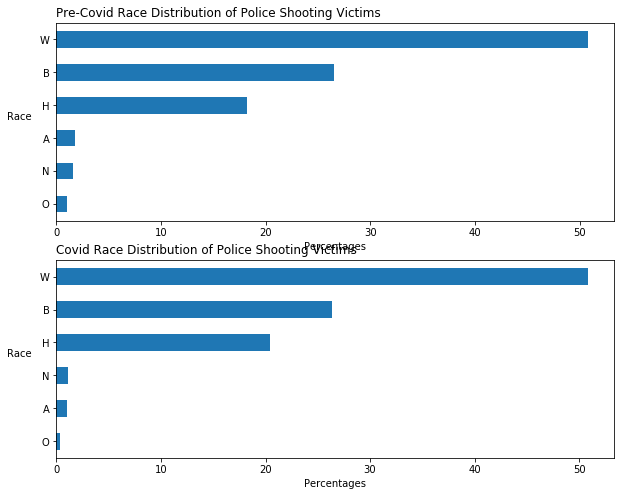

In [23]:
fig, (ax, ax2) = plt.subplots(nrows=2)

# We need to use percentages instead of counts because there are a different number of incidents pre-covid vs. covid.
pre_covid_percentages = pre_covid['race'].value_counts(ascending=True) / len(pre_covid['race']) * 100
covid_percentages = covid['race'].value_counts(ascending=True) / len(covid['race']) * 100

pre_covid_percentages.plot(kind='barh', ax=ax)
covid_percentages.plot(kind='barh', ax=ax2)

fig.set_size_inches(10, 8)

ax.set_title("Pre-Covid Race Distribution of Police Shooting Victims", loc='left')
ax2.set_title("Covid Race Distribution of Police Shooting Victims", loc='left')
ax.set_xlabel("Percentages")
ax2.set_xlabel("Percentages")
ax.set_ylabel("Race", rotation=0)
ax2.set_ylabel("Race", rotation=0)
ax.yaxis.labelpad = 20
ax2.yaxis.labelpad = 20

Similar to the Weapon Types, the distribution of races among police shooting victimes is almost identical. From this plot, it appears that there was no change in races of police shooting victims between pre-covid and during covid.

Text(0.5, 0, 'Age')

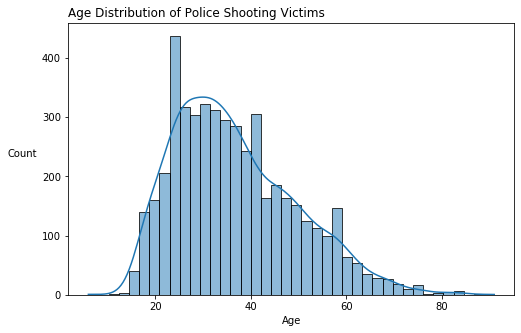

In [24]:
# What about their age?

sns.histplot(data=data, x="age", kde=True)

fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.title('Age Distribution of Police Shooting Victims', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Age')

This histogram of Police Shooting Victim ages from both before and after COVID-19 shows a slightly right skewed distribution, peaking at around 25-35 years old. 

Text(0.0, 1.0, 'Age Distribution of Police Shooting Victims (During-Covid)')

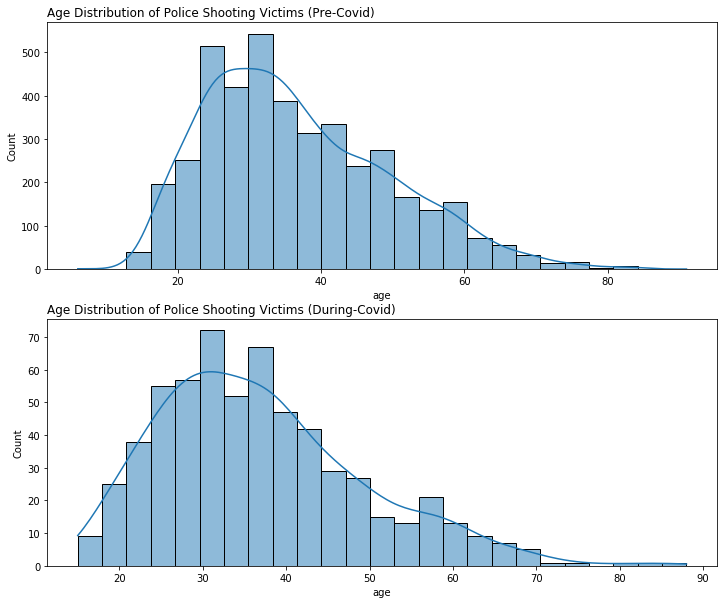

In [25]:
fig, axes = plt.subplots(2, 1)
fig.set_size_inches(12, 10)
sns.histplot(data=pre_covid, x="age", kde=True,ax = axes[0], bins = 25).\
set_title("Age Distribution of Police Shooting Victims (Pre-Covid)",loc='left')

sns.histplot(data=covid, x="age", kde=True,bins = 25).\
set_title("Age Distribution of Police Shooting Victims (During-Covid)",loc='left')


In these plots, the ages of Police Shooting victims are similar. Both distributions indicate a right skew with the peak around 25-35 years old.

95.05% of the victims are Male.
4.95% of the victims are Female.


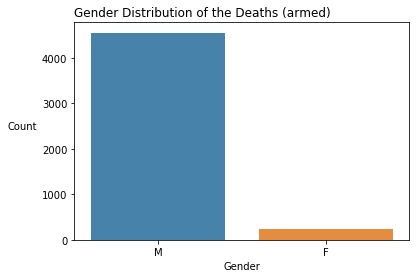

In [26]:
# Gender?

sns.countplot(data = data, x = 'gender', alpha = 0.9)

fig = plt.gcf()
plt.title('Gender Distribution of the Deaths (armed)', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Gender')

print("{:.2f}".format(data['gender'].value_counts()[0] / (data['gender'].value_counts()[0] + data['gender'].value_counts()[1]) * 100) + '% of the victims are Male.')
print("{:.2f}".format(data['gender'].value_counts()[1] / (data['gender'].value_counts()[0] + data['gender'].value_counts()[1]) * 100) + '% of the victims are Female.')

This histogram reveals that the Police Shooting victims' genders are almost completed comprised of male victims with only 5.03% female victims. Another concern worth noting is that the dataset lacks information on non-binary gendered individuals.

Text(0.0, 1.0, 'Gender Distribution of Police Shooting Victims (During-Covid)')

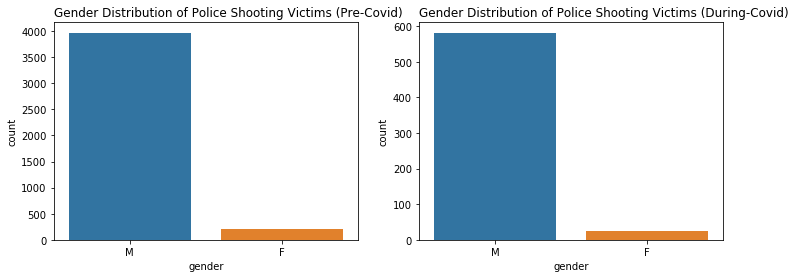

In [27]:
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(12, 4)
sns.countplot(data=pre_covid, x="gender", ax = axes[0]).\
set_title("Gender Distribution of Police Shooting Victims (Pre-Covid)",loc='left')

sns.countplot(data=covid, x="gender").\
set_title("Gender Distribution of Police Shooting Victims (During-Covid)",loc='left')


Since the dataset provides the state of each fatal gun shootings, let us take a look at the distribution of the location of the deaths. This choropleth map reveals three big states with the most fatal police shootings from 2015 to 2020: California, Texas, and Florida. The result is reasonable because these three places have more population in general.

In [28]:
# Choropleth map

fig = go.Figure(data=go.Choropleth(locations=sorted(data.state.unique()),
                    z=data.groupby('state').count()['id'],
                    locationmode="USA-states",
                    colorscale='amp'))
#fig.update_layout(title_text = '2015-2020 US Fatal Police Shootings Deaths by State', geo_scope='usa',)

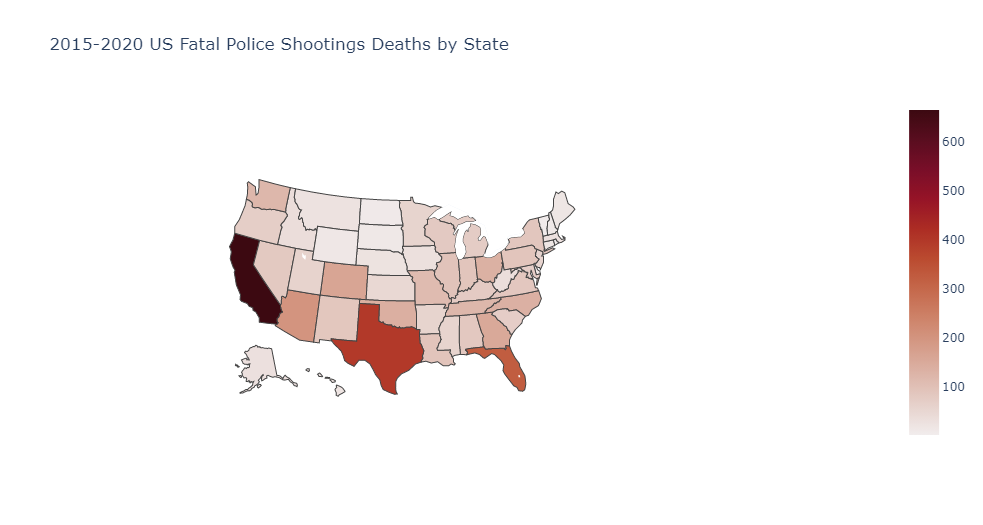

In [29]:
Image(filename='newplot.png')

# Bivariate

Next, we want to know the relationship between gun fatal shooting and time. We will be comparing the number of deaths by days and years.

detailed police gun shooting cases in each year and month


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2015,69,73,86,80,65,62,95,83,78,72,68,75
2016,77,78,86,65,60,74,62,71,66,66,56,50
2017,86,82,65,52,58,72,79,73,57,71,68,37
2018,85,64,88,83,65,67,75,65,49,57,47,55
2019,71,66,71,55,53,72,67,49,55,65,65,93
2020,74,62,56,49,84,55,54,73,48,65,62,6


Text(0.5, 0, 'year')

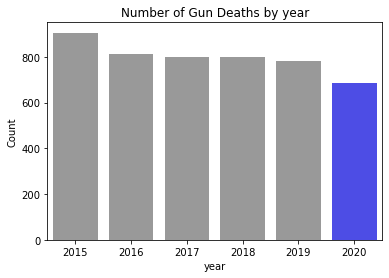

In [30]:
# total number 
# generate the data
print('detailed police gun shooting cases in each year and month')
death_pivot = data.pivot_table(
        values="race",
        index="year",
        columns="month",
        aggfunc="count"
    )
display(death_pivot)
sns.countplot(data = data,x ='year',
              palette={2015:'grey',2016:'grey',2017:'grey',2018:'grey',2019:'grey',2020:'blue'},
             alpha = 0.8)  

plt.title('Number of Gun Deaths by year')
plt.ylabel('Count')
plt.xlabel('year')

We can see that 2020 had a drop in numbers.

Text(0.5, 0, 'Month')

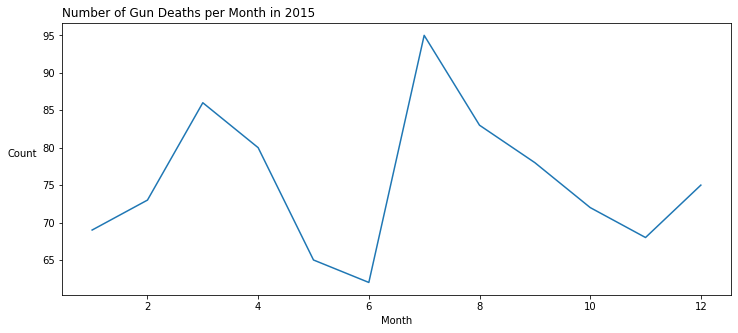

In [31]:
# Gun Deaths in 2015 (per month)
data[(data['year'] == 2015)].groupby('month').count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in 2015', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

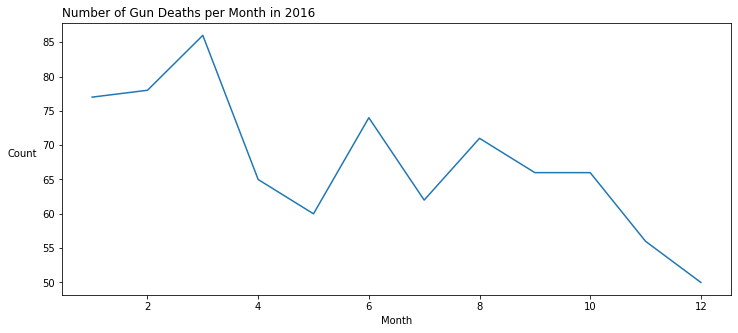

In [32]:
# Gun Deaths in 2016 (per month)
data[(data['year'] == 2016)].groupby('month').count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in 2016', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

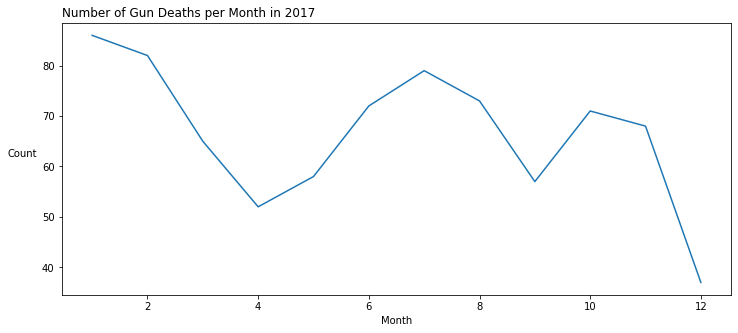

In [33]:
# Gun Deaths in 2017 (per month)
data[(data['year'] == 2017)].groupby('month').count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in 2017', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

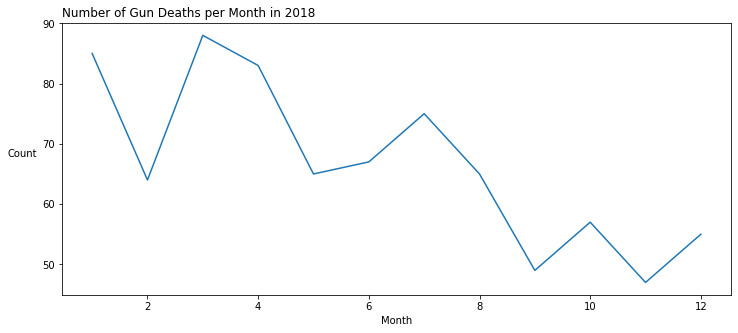

In [34]:
# Gun Deaths in 2018 (per month)
data[(data['year'] == 2018)].groupby('month').count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in 2018', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

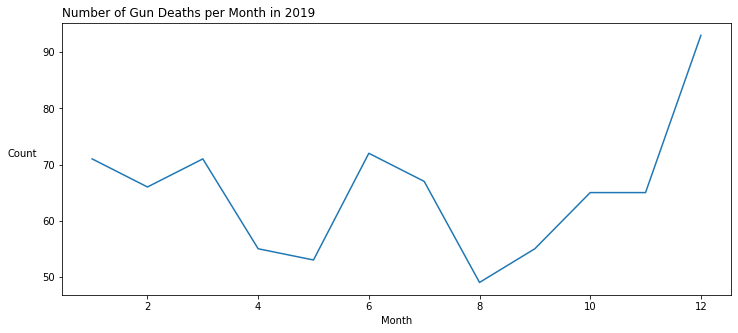

In [35]:
# Gun Deaths in 2019 (per month)
data[(data['year'] == 2019)].groupby('month').count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in 2019', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Month')

Text(0.5, 0, 'Month')

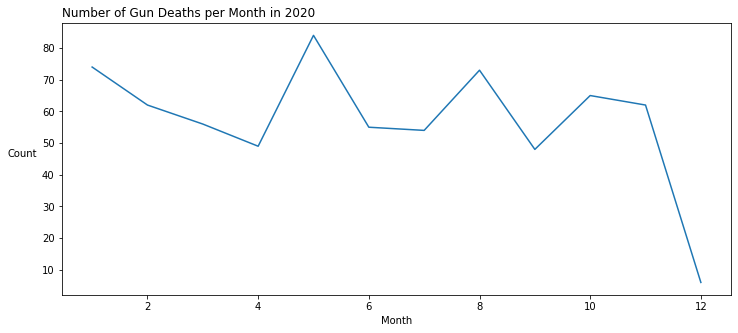

In [36]:
# Gun Deaths in 2020 (per month)
data[(data['year'] == 2020)].groupby('month').count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in 2020', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Month')

These line charts allow viewers to see how the monthly numbers for each year. Let's combine them for a total result.

Text(0.5, 0, 'Month')

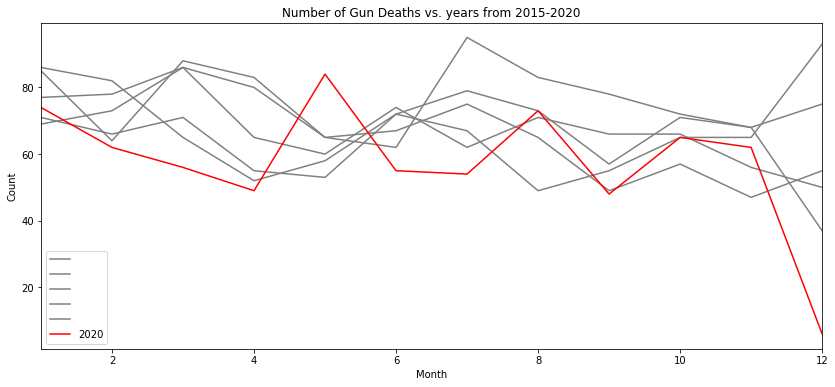

In [37]:
# Gun Deaths vs. years 2015-2020
fig,ax = plt.subplots(figsize=(14, 6))
sns.lineplot(data = death_pivot.T[2015], color = 'grey')
sns.lineplot(data = death_pivot.T[2016], color = 'grey')
sns.lineplot(data = death_pivot.T[2017], color = 'grey')
sns.lineplot(data = death_pivot.T[2018], color = 'grey')
sns.lineplot(data = death_pivot.T[2019], color = 'grey')
sns.lineplot(data = death_pivot.T[2020], color = 'red')
plt.title('Number of Gun Deaths vs. years from 2015-2020')
plt.legend(labels=['', '', '','','','2020'])
ax.set(xlim=(1, 12))
plt.ylabel('Count')
plt.xlabel('Month')

We can see that 2020 has the lowest numbers for the most part, though there is an unusual spike on May.

Text(0.5, 0, 'Year, Month')

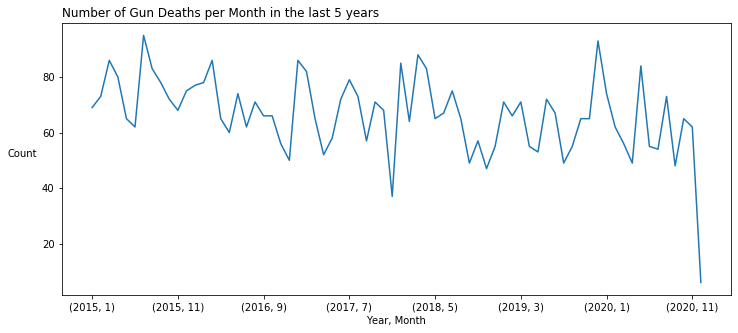

In [38]:
# Gun Deaths in 5 years (per month)
data.groupby(['year','month']).count()['id'].plot.line()

fig = plt.gcf()
fig.set_size_inches(12, 5)
plt.title('Number of Gun Deaths per Month in the last 5 years', loc='left')
plt.ylabel('Count', rotation=0, labelpad=20)
plt.xlabel('Year, Month')

The line chart above shows the time series of the number of gun deaths. We will use bar charts to show the comparisons between months below.

In [39]:
t15 = data[data['year'] == 2015].groupby('month').count()['id'].values
t16 = data[data['year'] == 2016].groupby('month').count()['id'].values
t17 = data[data['year'] == 2017].groupby('month').count()['id'].values
t18 = data[data['year'] == 2018].groupby('month').count()['id'].values
t19 = data[data['year'] == 2019].groupby('month').count()['id'].values
t20 = data[data['year'] == 2020].groupby('month').count()['id'].values

Text(0.5, 0, 'Month')

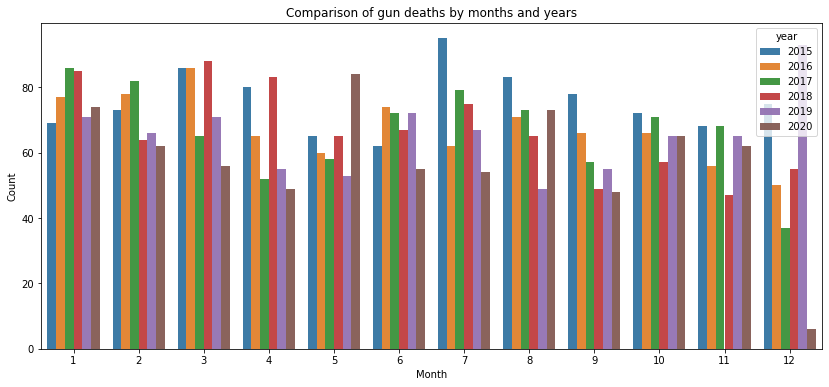

In [40]:
plt.figure(figsize=(14, 6))

sns.countplot(x="month", hue="year", data=data,alpha = 0.95)
plt.title('Comparison of gun deaths by months and years')
plt.ylabel('Count')
plt.xlabel('Month')


As we can see, the months in 2020 (shown in color brown) has slight decreases in the number of deaths for the most part. For the next part, we will be using a statistical method called t-test to further validate our generalization.

# Test

Our t-test will compare the data from 2015-2019 with 2020. In order to output a solid conclusion, we will use two settings to compare the data: months and days. Let us start with monthly comparison using t-test.

# Month
We will use t-test to compare the monthly statistics in 2020 vs. the mean of the past 5 years monthly statistics.

Since 02/03 is the date when CDC declares emergency outbreak. We will exclude month of January in our t-test. We will also exclude month of December because December of 2020 is still on going.

In [41]:
# t-test
combined_mean = (t15+t16+t17+t18+t19)/5
results = stats.ttest_ind(t20[1:-1], combined_mean[1:-1])

print(results)
print('P-Value: ', results[1])

Ttest_indResult(statistic=-1.7769171062073699, pvalue=0.09248488196390678)
P-Value:  0.09248488196390678


# Day
02/03 is the date when CDC declares emergency outbreak. We will use this date as a threshold to determine whether COVID affects the number of gun deaths per days. 

We will be using a regression model to predict the gun death numbers after 02/03. In order to make our data consisten, will only use the data from 02/03 to 12/03 for each year. The predicted result will be our expected number of gun deaths. Then we will use our actual numbers to compare with the expected numbers using T-test. Our training set would be the daily number of deaths from 2015 to 2019. Our testing set would be the daily number of deaths in 2020.

In [42]:
# Save the data into a DataFrame
df = pd.DataFrame()
df['Date'] = data.groupby('date').count()['id'].index.values 
df['Number of gun deaths'] = data.groupby('date').count()['id'].values 
df.head()

,Date,Number of gun deaths
0,2015-01-02,2
1,2015-01-03,1
2,2015-01-04,3
3,2015-01-05,1
4,2015-01-06,4


In [43]:
t015 = df[(df['Date'] >= '2015-02-03') & (df['Date'] < '2015-12-03')]
t016 = df[(df['Date'] >= '2016-02-03') & (df['Date'] < '2016-12-03')]
t017 = df[(df['Date'] >= '2017-02-03') & (df['Date'] < '2017-12-03')]
t018 = df[(df['Date'] >= '2018-02-03') & (df['Date'] < '2018-12-03')]
t019 = df[(df['Date'] >= '2019-02-03') & (df['Date'] < '2019-12-03')]
t020 = df[(df['Date'] >= '2020-02-03') & (df['Date'] < '2020-12-03')]
t019.head()

,Date,Number of gun deaths
1307,2019-02-03,2
1308,2019-02-04,2
1309,2019-02-05,1
1310,2019-02-06,4
1311,2019-02-07,6


In [44]:
# Fill in missing dates with 0

idx = pd.date_range('2015-02-03', '2015-12-03')
for i in idx:
    if (len(t015[t015['Date'] == i])==0):
        t015 = t015.append({'Date': i, 'Number of gun deaths': 0}, ignore_index= True)
t015 = t015.sort_values('Date')

idx = pd.date_range('2016-02-03', '2016-12-03')
for i in idx:
    if (len(t016[t016['Date'] == i])==0):
        t016 = t016.append({'Date': i, 'Number of gun deaths': 0}, ignore_index= True)
t016 = t016.sort_values('Date')

idx = pd.date_range('2017-02-03', '2017-12-03')
for i in idx:
    if (len(t017[t017['Date'] == i])==0):
        t017 = t017.append({'Date': i, 'Number of gun deaths': 0}, ignore_index= True)
t017 = t017.sort_values('Date')

idx = pd.date_range('2018-02-03', '2018-12-03')
for i in idx:
    if (len(t018[t018['Date'] == i])==0):
        t018 = t018.append({'Date': i, 'Number of gun deaths': 0}, ignore_index= True)
t018 = t018.sort_values('Date')

idx = pd.date_range('2019-02-03', '2019-12-03')
for i in idx:
    if (len(t019[t019['Date'] == i])==0):
        t019 = t019.append({'Date': i, 'Number of gun deaths': 0}, ignore_index= True)
t019 = t019.sort_values('Date')

idx = pd.date_range('2020-02-03', '2020-12-03')
for i in idx:
    if (len(t020[t020['Date'] == i])==0):
        t020 = t020.append({'Date': i, 'Number of gun deaths': 0}, ignore_index= True)
t020 = t020.sort_values('Date')

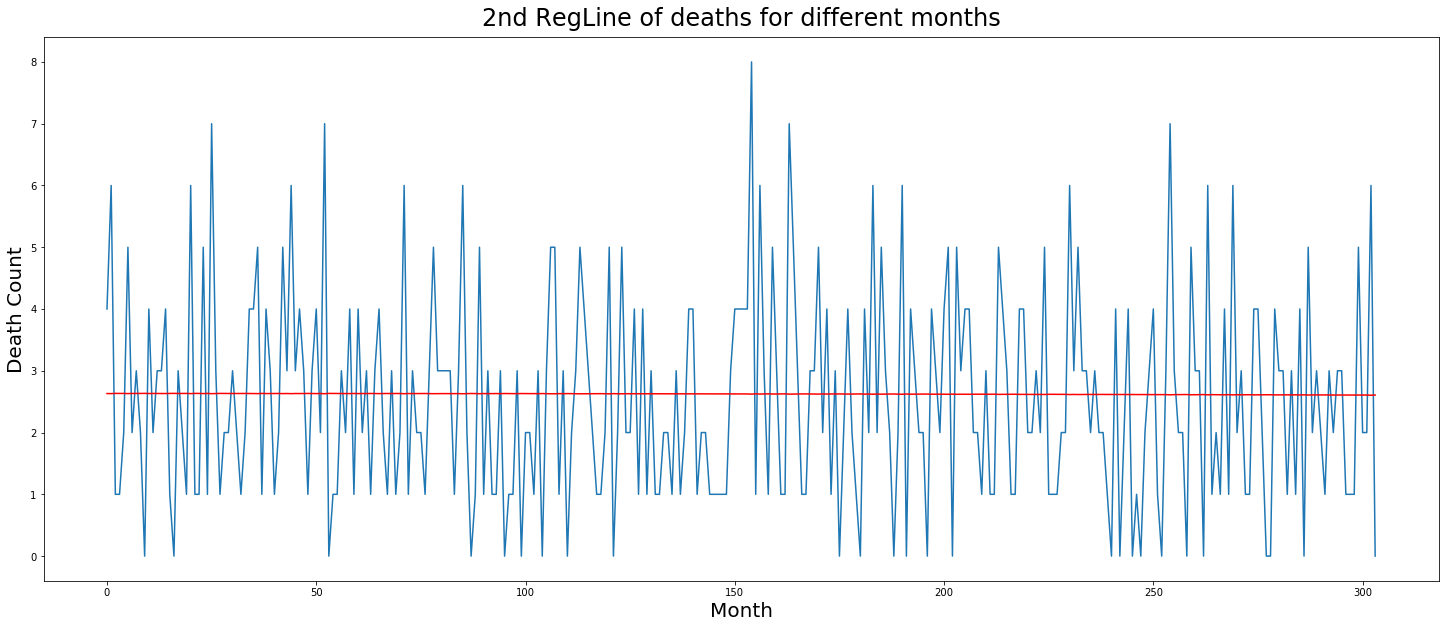

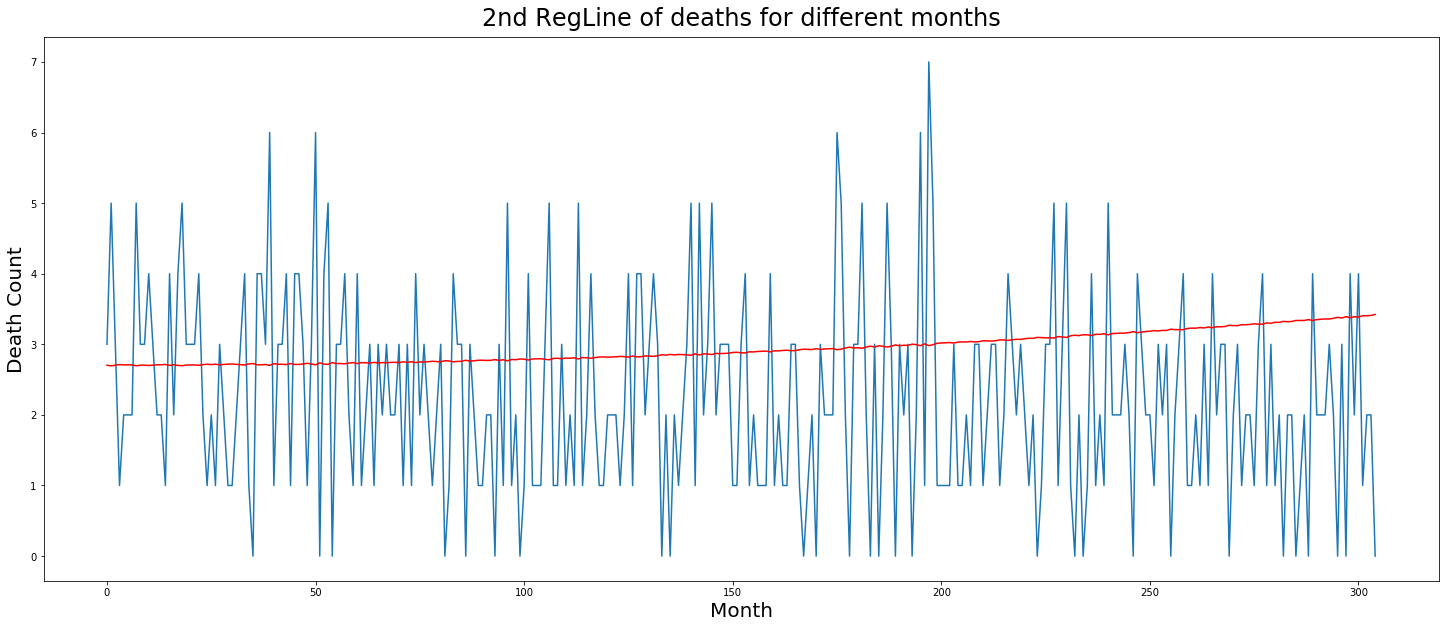

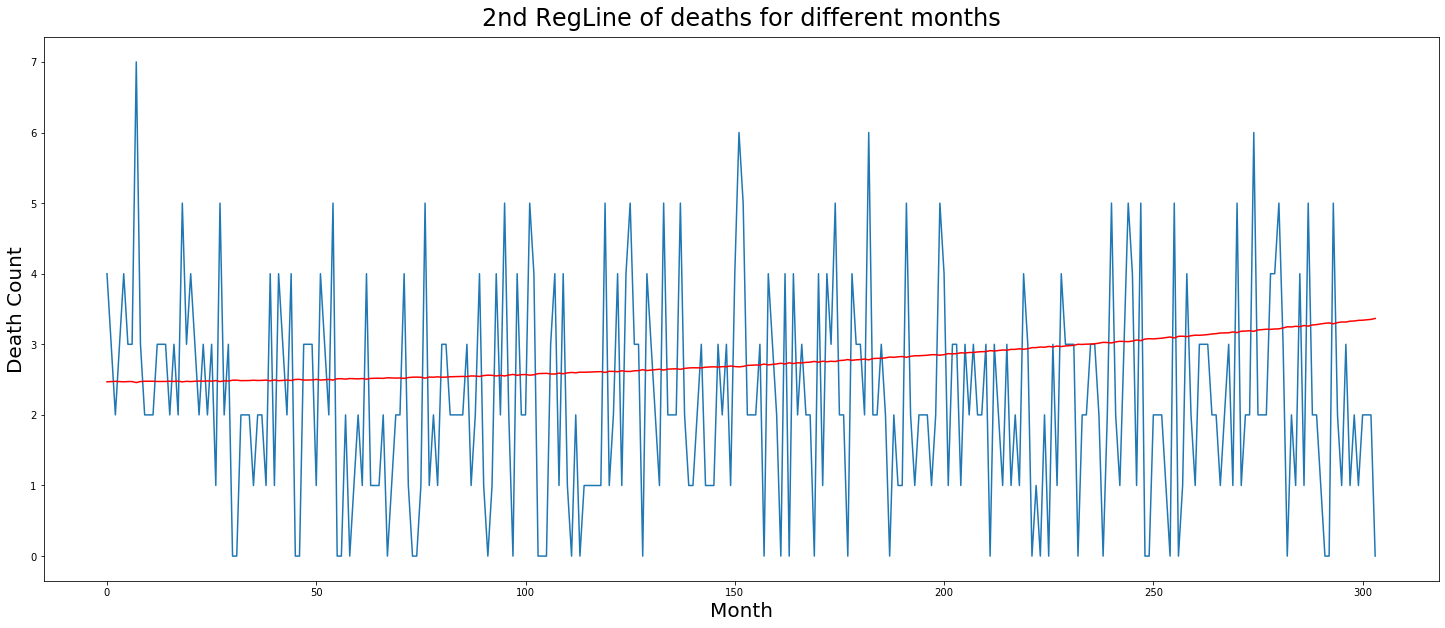

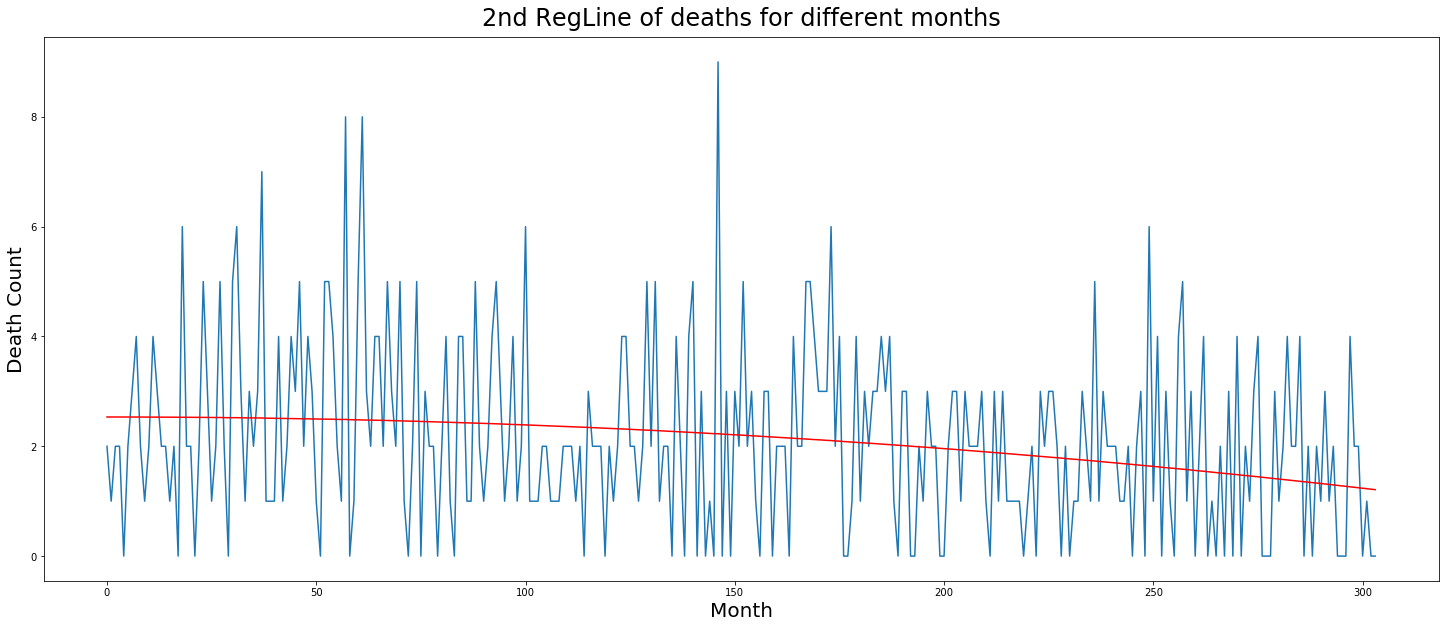

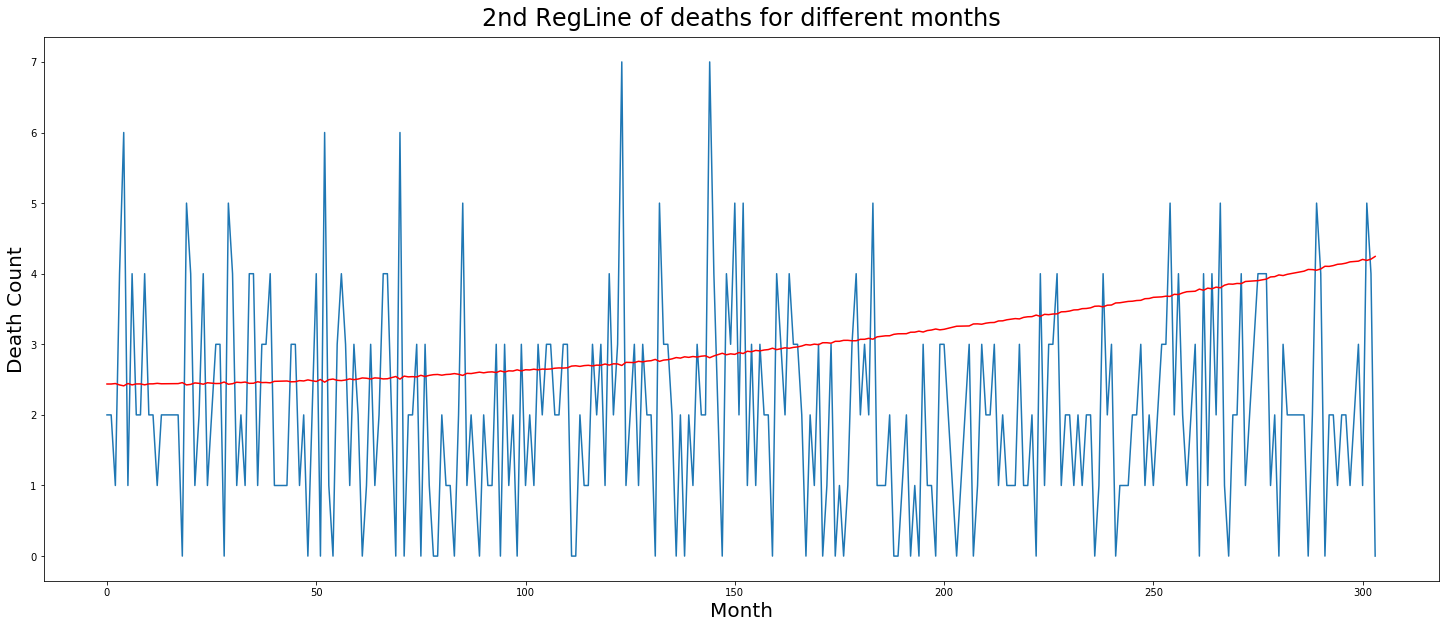

In [46]:
ms, m1s, bs = [],[],[]

for table in [t015,t016,t017,t018,t019]:

    x15,y15 = np.array(range(len(table.index.values))),table['Number of gun deaths']
    m, m1, b = np.polyfit(x15, y15, 2)
    ms.append(m)
    m1s.append(m1)
    bs.append(b)
    plt.figure(figsize=(25,10))
    plt.plot(x15, y15)
    plt.plot(x15, m*pow(x15, 2) + m1*y15 + b, color='red')
    plt.ylabel('Death Count', fontsize=20)
    plt.xlabel('Month', fontsize=20)
    plt.title('2nd RegLine of deaths for different months', fontsize=24, y=1.01)

In [47]:
m20, m120, b20 = np.mean(ms), np.mean(m1s), np.mean(bs)

In [48]:
expected_2020 = np.round(m20*pow(np.array(range(len(t020.index.values))), 2) + m120*np.array(range(len(t020.index.values))) + b20).astype('int64')
expected_2020

array([3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,

In [49]:
observed_2020 = t020['Number of gun deaths'].values
observed_2020

array([1, 4, 2, 1, 1, 1, 4, 3, 0, 2, 4, 3, 1, 4, 2, 1, 1, 2, 1, 1, 0, 3,
       6, 3, 3, 1, 2, 3, 2, 2, 0, 2, 3, 1, 5, 2, 1, 2, 3, 2, 4, 1, 4, 1,
       3, 1, 1, 0, 0, 2, 4, 1, 2, 0, 0, 0, 1, 3, 1, 3, 0, 1, 2, 2, 4, 2,
       2, 1, 3, 0, 0, 0, 3, 1, 1, 2, 2, 0, 2, 2, 1, 4, 1, 1, 1, 3, 3, 1,
       6, 0, 7, 1, 5, 3, 4, 0, 7, 1, 0, 1, 1, 3, 3, 3, 2, 2, 4, 1, 2, 0,
       3, 1, 3, 5, 4, 4, 5, 1, 2, 2, 1, 3, 0, 2, 3, 2, 1, 2, 0, 0, 2, 3,
       0, 1, 2, 2, 4, 1, 0, 1, 2, 2, 1, 3, 3, 6, 1, 3, 2, 1, 2, 1, 2, 3,
       1, 2, 1, 1, 3, 2, 2, 1, 5, 2, 3, 2, 1, 0, 2, 2, 2, 1, 3, 2, 1, 1,
       1, 2, 2, 0, 1, 3, 1, 4, 1, 2, 3, 5, 2, 5, 2, 0, 1, 0, 5, 3, 4, 3,
       3, 2, 3, 2, 1, 1, 3, 3, 1, 1, 3, 1, 4, 1, 1, 2, 2, 2, 2, 1, 2, 2,
       4, 0, 1, 1, 0, 2, 0, 1, 4, 3, 1, 3, 2, 1, 4, 1, 0, 1, 1, 1, 2, 0,
       5, 2, 1, 1, 4, 0, 4, 4, 1, 0, 2, 2, 2, 2, 4, 2, 3, 1, 6, 1, 3, 2,
       1, 0, 2, 2, 3, 2, 1, 2, 3, 3, 4, 6, 4, 1, 4, 3, 1, 2, 2, 0, 5, 2,
       1, 2, 4, 1, 3, 0, 1, 3, 1, 2, 0, 2, 0, 0, 1,

In [50]:
results = stats.ttest_ind(observed_2020, expected_2020)

print(results)
print('P-Value: ', results[1])

Ttest_indResult(statistic=-1.0545907420387406, pvalue=0.2920314299471333)
P-Value:  0.2920314299471333


# Results

Our result shows that the p-value is less than 0.05 which indicates that the decrease in crime rate between observed data and actual data did not occur by random chance. As a result, we will reject our null hypothesis. Based on prior background knowledge, it was not a surprise that the gun shooting events would go down since the pandemic which we can see from previously plotted charts. Overall, our result shows that there is correlation between gun shooting event frequency and COVID-19 pandemic.

# Ethics & Privacy

The datasets is assembled by Github users from The Washington Post and published on Github. It is updated regularly as fatal shootings are reported and as facts emerge about individual cases. Since they are posted publicly on Github, we could assume that the publishers are aware of others' usage. However, it is extremely hard to get informed consent from each subject, especially for shooting cases in the data collection process. The dataset comes from The Washington Post, which is one of the largest newspaper publisher; thus we trust that dataset would carefully reflect and record each fetal case. Also, the size of the datasets is large enough (above 4000 observations) for us to make a scientific and reliable conclusion, enabling this to be replicable in the future.


To ensure privacy is well protected, we minimize exposure of personally identifiable information (PII) and protect the subjects from potential unintended consequences (In this project, particularly, we drop name and city variables). We need to reach out to the dataset publisher to 1) obtain his/her permission to use the dataset, 2) the subjects are aware of study, and 3) ensure that the dataset’s reliability and the data. Also, during the project, each of us should remind ourselves that each observation represents a single human being, and we have to conduct our project in an ethical and equitable manner to further limit the potential bias. By following those above, we could confirm that our project is conducted within ethical guidelines.



# Conclusion & Discussion

In conclusion, with the pandemic of COVID-19, American police fatal shootings did decrease. However, the pandemic of COVID-19 did not affect the race and age distributions of the police shooting victims, as well as the weapon type that the police shooting victims had.

Our analysis was limited because we did not have enough data after the spread of COVID-19. We had large number of data before COVID-19, but we lacked the data after COVID-19 since it only occurred for almost a year in the U.S.. Another limitation that we had was finding the causality between COVID-19 and the number of police shooting cases. Altough we had proven that the cases did decrease after COVID-19, we were still unsure of whether COVID-19 was the (only) factor that was behind this drop.

This project would still be applicable in the future because COVID-19 is still ongoing and the number of police shooting events will increase in America. We would like to review this project again when COVID-19 is gone and update our data to test our hypothesis once again.

# Team Contributions

Eric Wang: Research Question, Data Cleaning, Univariate Analysis, Data Visualizations.

Jinsong Yang: Hypothesis, Results, T-tests.

Xueru Xie: Background and Prior Work, Univariate & Bivariate Analysis.

Yilan Guo: Dataset, Ethics & Privacy, Data Visualizations.

Zeqian Min: Overview, Conclusion & Discussion.
